In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns



# Dataframe

#####**Fixed Acidity**: are non-volatile acids that do not evaporate readily
#####**Volatile Acidity**: are high acetic acid in wine which leads to an unpleasant vinegar taste
#####**Citric Acid**: acts as a preservative to increase acidity. When in small quantities, adds freshness and flavor to wines
#####**Residual Suga**r: is the amount of sugar remaining after fermentation stops. The key is to have a perfect balance between sweetness and sourness. It is important to note that wines > 45g/ltrs are sweet
#####**Chlorides**: the amount of salt in the wine
#####**Free Sulfur Dioxide**: it prevents microbial growth and the oxidation of wine
#####**Total Sulfur Dioxide**: is the amount of free + bound forms of SO2
#####**Density**: sweeter wines have a higher density
#####**pH**: describes the level of acidity on a scale of 0–14. Most wines are always between 3–4 on the pH scale
#####**Alcohol**: available in small quantities in wines makes the drinkers sociable
#####**Sulphates**: a wine additive that contributes to SO2 levels and acts as an antimicrobial and antioxidant
#####**Quality**: which is the output variable/predictor







In [32]:
import requests


r=requests.get('http://127.0.0.1:8000/wine')
df=pd.DataFrame.from_dict(r.json())


df=df.drop("id", axis=1)
df=df.drop("color", axis=1)

display(df)



,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [34]:
#valori nulli
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

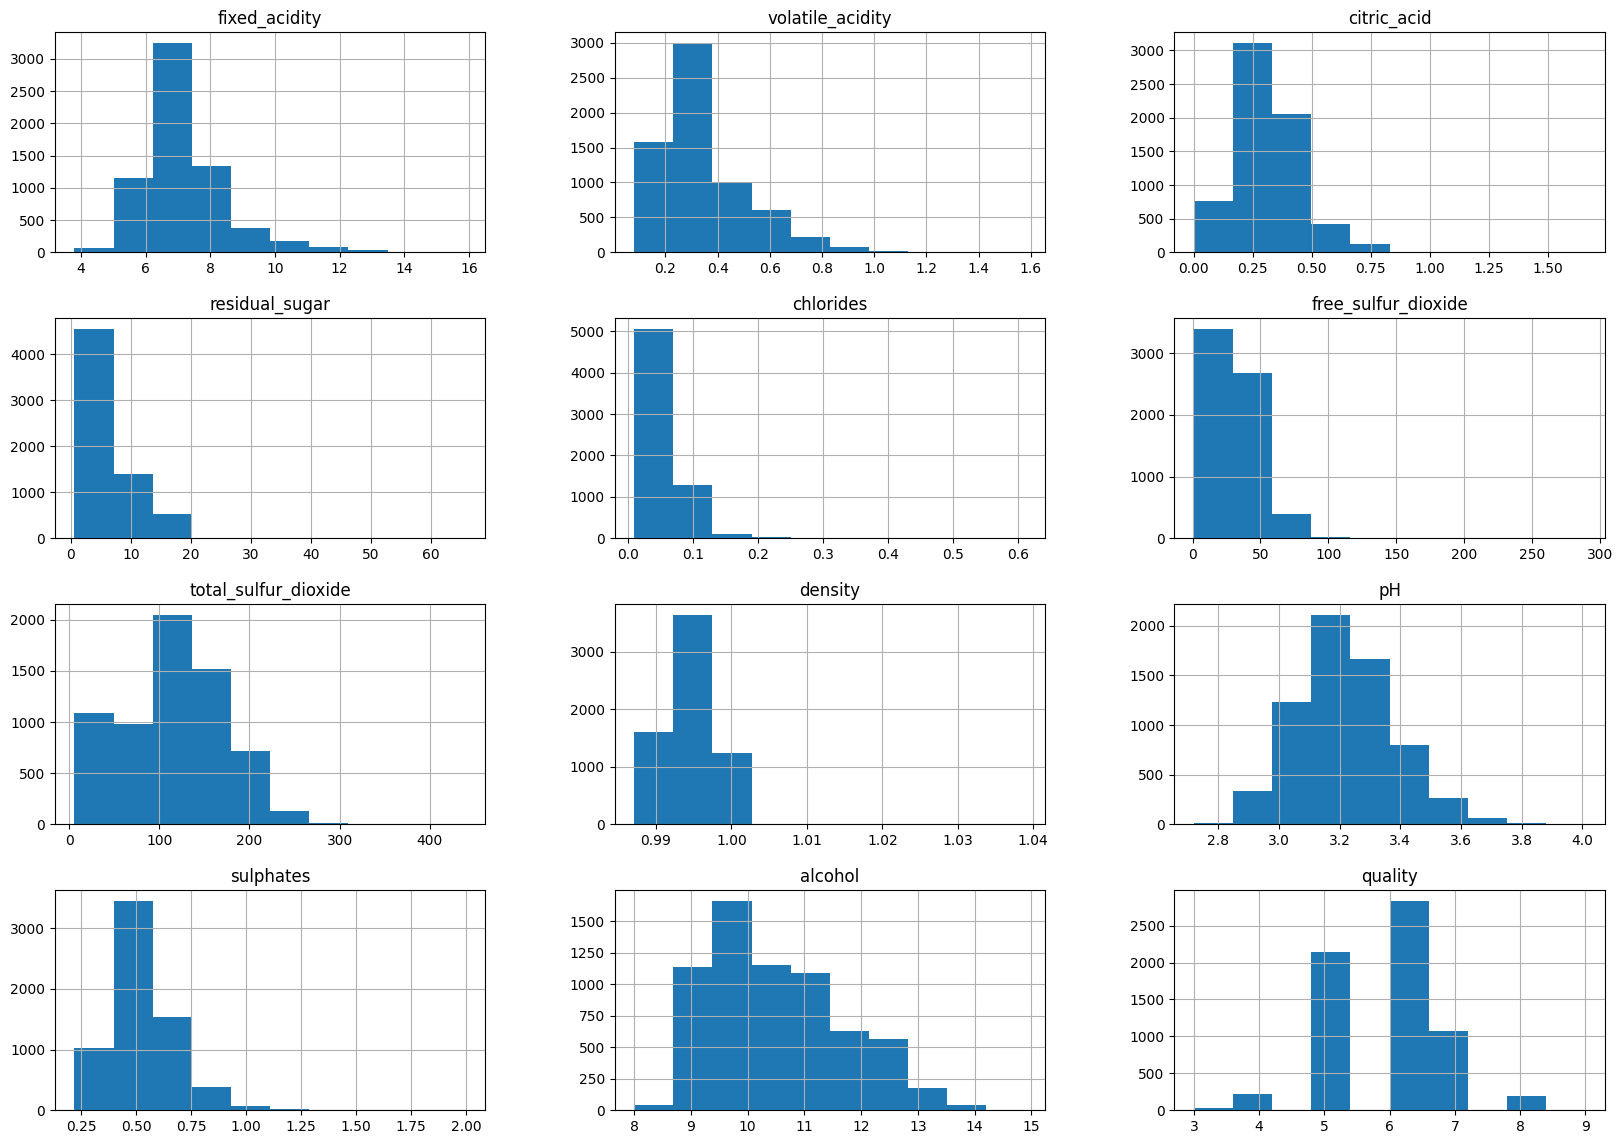

In [35]:
#grafici variabili
df.hist(figsize=(20,14))
plt.show()

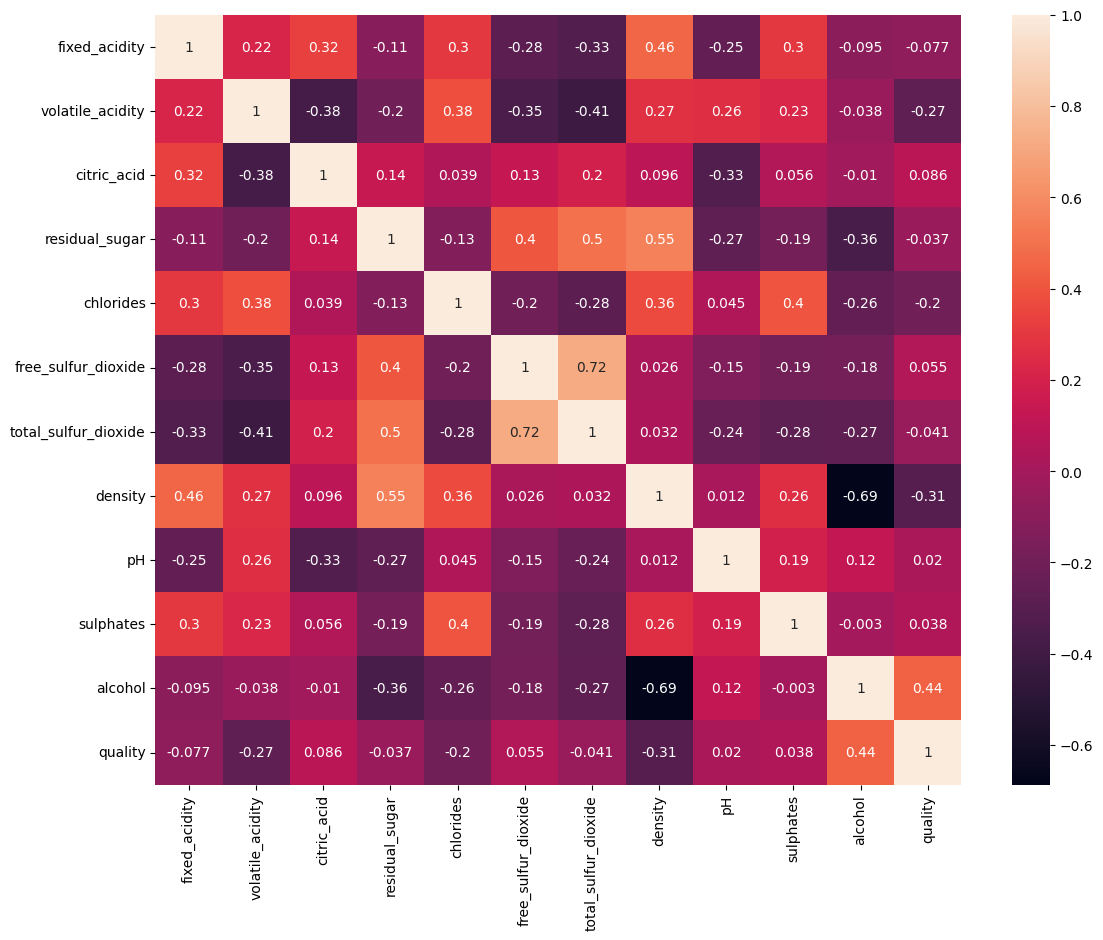

In [36]:
#heatmap correlazioni
plt.figure(figsize=(13, 10))
corr_matrix = df.corr(numeric_only = True)

sns.heatmap(corr_matrix, annot=True)
plt.show()

####C'è una correlazione tra la quantità di alcool e la qualità del vino
####Dal grafico si può notare anche una forte correlazion tra free sulfur dioxide e total sulfur dioxide, quindi una delle due variabili deve essere eliminata perchè può creare problemi di multicollinearità, scelgo di eliminare total sulfur dioxide perchè meno correlata a quality.

In [39]:
df.groupby('quality').mean()
#raggruppando per i vini in base alla loro qualità vediamo che i vini hanno qualità da 3 a 9, e che nei vini con la qualità più alta
#il grado alcolico è più elevato.

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.853333,0.517000,0.281000,5.140000,0.077033,39.216667,122.033333,0.995744,3.257667,0.506333,10.215000
4,7.288889,0.457963,0.272315,4.153704,0.060056,20.636574,103.432870,0.994833,3.231620,0.505648,10.180093
5,7.326801,0.389614,0.307722,5.804116,0.064666,30.237371,120.839102,0.995849,3.212189,0.526403,9.837783
6,7.177257,0.313863,0.323583,5.549753,0.054157,31.165021,115.410790,0.994558,3.217726,0.532549,10.587553
7,7.128962,0.288800,0.334764,4.731696,0.045272,30.422150,108.498610,0.993126,3.228072,0.547025,11.386006
8,6.835233,0.291010,0.332539,5.382902,0.041124,34.533679,117.518135,0.992514,3.223212,0.512487,11.678756
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


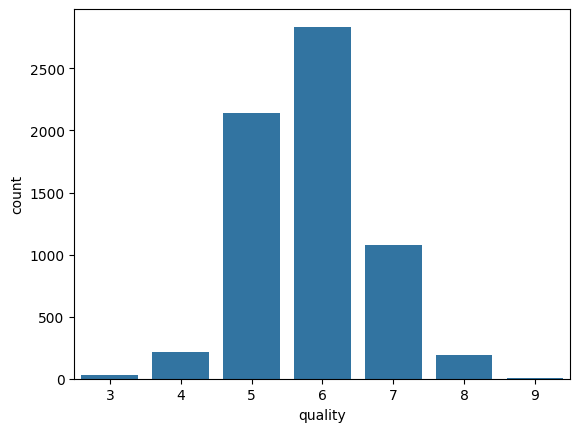

In [50]:
sns.countplot(x=df['quality'])
plt.show()
#grafico che conta i vini in base alla qualità

In [ ]:
x = df.drop(["quality"], axis=1).values

#creo la mia variabile indipendente x, una lista composta da tutte le colonne del df tranne:
#'quality' che sarà parte della y
#'total sulfur dioxide' per evitare problemi di multicollinearità come detto in precedenza.
#'color' perchè c'è troppa differenza tra il numero di vini rossi e bianchi

y = df["quality"].values
#creo la mia variabile dipendente y, la qualità

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5197, 11)
(1300, 11)
(5197,)
(1300,)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
x_train=scaling.fit_transform(x_train)
x_test=scaling.fit_transform(x_test)



from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=10000)
model.fit(x_train,y_train)
model.score(x_test,y_test)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Precisione:', accuracy)

Precisione: 0.553076923076923


In [ ]:

# importo librerie pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# validazione
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



# testa e valida una pipeline generica
def pipeline_validation(pipeline, x, y):
    # split
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

    # training
    pipeline.fit(x_train, y_train)

    # predict
    y_pred = pipeline.predict(x_val)

    # error test
    mse = mean_squared_error(y_val, y_pred)
    r2  = r2_score(y_val, y_pred)

    scores_df = pd.DataFrame({'rmse': [np.sqrt(mse)], 'r2': [r2]})
    display(scores_df)
    print("\n")


def plot_learning_curve(pipeline, x, y):

  x_len = len(x)
  train_size_60 = int((x_len * 60) / 100)
  train_size_70 = int((x_len * 70) / 100)
  train_size_80 = int((x_len * 80) / 100)

  train_sizes = [train_size_60, train_size_70, train_size_80]

  train_size_abs, train_scores, valid_scores = learning_curve(pipeline,
                                                           x,
                                                           y,
                                                           train_sizes = train_sizes)

  train_mean = np.mean(train_scores, axis=1)
  valid_mean = np.mean(valid_scores, axis=1)


  scores_df = pd.DataFrame({'train': train_mean, 'validation': valid_mean})
  display(scores_df)

  plt.figure(figsize=(12, 8))
  plt.plot(train_size_abs, train_mean, color='red', marker='o', markersize=5, label='Training Accuracy')
  plt.plot(train_size_abs, valid_mean, color='green', marker='o', markersize=5, label='CrossValidation Accuracy')
  plt.legend()
  plt.show()


,rmse,r2
0,0.82135,0.162494


,train,validation
0,0.544690,0.493007
1,0.545503,0.494240
2,0.547931,0.499475


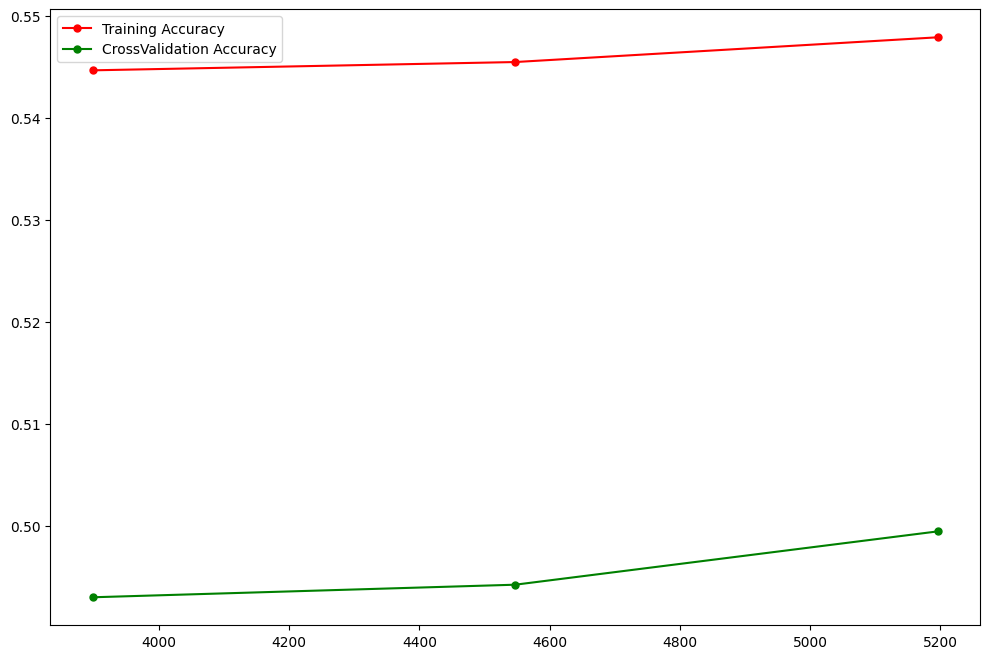

In [ ]:
# test
pipeline_validation(make_pipeline(StandardScaler(), LogisticRegression(max_iter=10000)), x, y)
plot_learning_curve(make_pipeline(StandardScaler(), LogisticRegression(max_iter=10000)), x, y)